In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import  MultiLabelBinarizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import (
                            accuracy_score, 
                             precision_score, recall_score, 
                             f1_score, confusion_matrix,
                             ConfusionMatrixDisplay,
                            #  classification_report
                             )

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [4]:
df.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [5]:
df.shape

(481, 21)

## Data Preprocessing

## Handling Missing Values

In [6]:
df.isnull().sum()

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

In [7]:
#Removing missing value
df.dropna(axis = 0 , inplace = True)

In [8]:
df.isnull().sum()

Timestamp                                                                                                               0
1. What is your age?                                                                                                    0
2. Gender                                                                                                               0
3. Relationship Status                                                                                                  0
4. Occupation Status                                                                                                    0
5. What type of organizations are you affiliated with?                                                                  0
6. Do you use social media?                                                                                             0
7. What social media platforms do you commonly use?                                                                     0
8. What is the average t

In [9]:
## Renaming above columns to make it more redable
renaming_columns = {
    'Timestamp': 'date',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'affiliated_organizations',
    '6. Do you use social media?': 'use_social_media',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'daily_social_media_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'frequency_social_media_no_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'frequency_social_media_distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless_without_social_media',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distractibility_scale',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_level_scale',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_successful_people_scale',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feelings_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'frequency_seeking_validation',
    '18. How often do you feel depressed or down?': 'frequency_feeling_depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation_scale',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues_scale',
}

df = df.rename(columns = renaming_columns)

In [10]:
df['compare_to_successful_people_scale']

0      2
1      5
2      3
3      5
4      3
      ..
476    4
477    4
478    3
479    2
480    3
Name: compare_to_successful_people_scale, Length: 451, dtype: int64

In [11]:
#dropping irrelevant columns 
df.drop(columns = ['date', 'affiliated_organizations','compare_to_successful_people_scale','frequency_social_media_no_purpose'], axis = 1, inplace=True)

In [12]:
df.columns

Index(['age', 'gender', 'relationship_status', 'occupation_status',
       'use_social_media', 'social_media_platforms', 'daily_social_media_time',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'distractibility_scale', 'worry_level_scale',
       'difficulty_concentrating', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale'],
      dtype='object')

## Handling some categorical variables

In [13]:
df.dtypes

age                                  float64
gender                                object
relationship_status                   object
occupation_status                     object
use_social_media                      object
social_media_platforms                object
daily_social_media_time               object
frequency_social_media_distracted      int64
restless_without_social_media          int64
distractibility_scale                  int64
worry_level_scale                      int64
difficulty_concentrating               int64
feelings_about_comparisons             int64
frequency_seeking_validation           int64
frequency_feeling_depressed            int64
interest_fluctuation_scale             int64
sleep_issues_scale                     int64
dtype: object

In [14]:
df.dtypes

age                                  float64
gender                                object
relationship_status                   object
occupation_status                     object
use_social_media                      object
social_media_platforms                object
daily_social_media_time               object
frequency_social_media_distracted      int64
restless_without_social_media          int64
distractibility_scale                  int64
worry_level_scale                      int64
difficulty_concentrating               int64
feelings_about_comparisons             int64
frequency_seeking_validation           int64
frequency_feeling_depressed            int64
interest_fluctuation_scale             int64
sleep_issues_scale                     int64
dtype: object

## Preprocessing/cleaning for gender

## Note:: 
1. This code has some repeated value for Non-binary with some with a trailing space.So, updating this with identical data.
2. Also replacing unsure and There are others with with Non-binary as Non-binary fits the given categry

In [15]:
df['gender'].unique()

array(['Male', 'Female', 'Nonbinary ', 'Non-binary', 'unsure ',
       'Non binary ', 'There are others???'], dtype=object)

In [16]:
df_encoded = df.copy()

In [17]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3,2,5,2,5,3,2,5,4,5
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3,2,4,5,4,1,1,5,4,5
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2,1,2,5,4,3,1,4,2,5
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,2,1,3,5,3,1,2,4,3,2
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5,4,4,5,5,3,3,4,4,1


In [18]:
df_encoded['gender']  = df_encoded['gender'].replace(['Non binary ','Nonbinary ', 'unsure ', 'There are others???'],'Non-binary')

In [19]:
df_encoded['gender'].unique()

array(['Male', 'Female', 'Non-binary'], dtype=object)

In [20]:
# Handling categorical variables for gender
gender_mapping = {
    'Male': 0,
    'Female': 1,
    'Non-binary': 2
}
df_encoded['gender'] = df_encoded['gender'].map(gender_mapping)



In [21]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,0,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3,2,5,2,5,3,2,5,4,5
1,21.0,1,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3,2,4,5,4,1,1,5,4,5
2,21.0,1,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2,1,2,5,4,3,1,4,2,5
3,21.0,1,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,2,1,3,5,3,1,2,4,3,2
4,21.0,1,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5,4,4,5,5,3,3,4,4,1


In [22]:
df_encoded['occupation_status'].unique()

array(['University Student', 'Salaried Worker', 'School Student',
       'Retired'], dtype=object)

In [23]:
# Handling categorical variables for ocupation status
occupation_mapping = {
    'University Student': 0,
    'Salaried Worker': 1,
    'School Student': 2,
    'Retired': 3
}

df_encoded['occupation_status'] = df_encoded['occupation_status'].map(occupation_mapping)


In [24]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,0,In a relationship,0,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3,2,5,2,5,3,2,5,4,5
1,21.0,1,Single,0,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3,2,4,5,4,1,1,5,4,5
2,21.0,1,Single,0,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2,1,2,5,4,3,1,4,2,5
3,21.0,1,Single,0,Yes,"Facebook, Instagram",More than 5 hours,2,1,3,5,3,1,2,4,3,2
4,21.0,1,Single,0,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5,4,4,5,5,3,3,4,4,1


In [25]:
df.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3,2,5,2,5,3,2,5,4,5
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3,2,4,5,4,1,1,5,4,5
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2,1,2,5,4,3,1,4,2,5
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,2,1,3,5,3,1,2,4,3,2
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5,4,4,5,5,3,3,4,4,1


## Handling categorical variable for relation_status

In [26]:
df_encoded['relationship_status'].unique()

array(['In a relationship', 'Single', 'Married', 'Divorced'], dtype=object)

In [27]:
df_encoded['relationship_status'] = df_encoded['relationship_status'].replace('In a relationship','Relationship')

In [28]:
df_encoded['relationship_status'].unique()

array(['Relationship', 'Single', 'Married', 'Divorced'], dtype=object)

In [29]:

# Handling for 
relationship_mapping = {
    'Single': 0,
    'Relationship': 1,
    'Married': 2,
    'Divorced': 3
}

df_encoded['relationship_status'] = df_encoded['relationship_status'].map(relationship_mapping)




In [30]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,0,1,0,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3,2,5,2,5,3,2,5,4,5
1,21.0,1,0,0,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3,2,4,5,4,1,1,5,4,5
2,21.0,1,0,0,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2,1,2,5,4,3,1,4,2,5
3,21.0,1,0,0,Yes,"Facebook, Instagram",More than 5 hours,2,1,3,5,3,1,2,4,3,2
4,21.0,1,0,0,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5,4,4,5,5,3,3,4,4,1


## Exploratory Data analytics 

In [31]:
df.columns

Index(['age', 'gender', 'relationship_status', 'occupation_status',
       'use_social_media', 'social_media_platforms', 'daily_social_media_time',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'distractibility_scale', 'worry_level_scale',
       'difficulty_concentrating', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale'],
      dtype='object')

## Finding outliers 

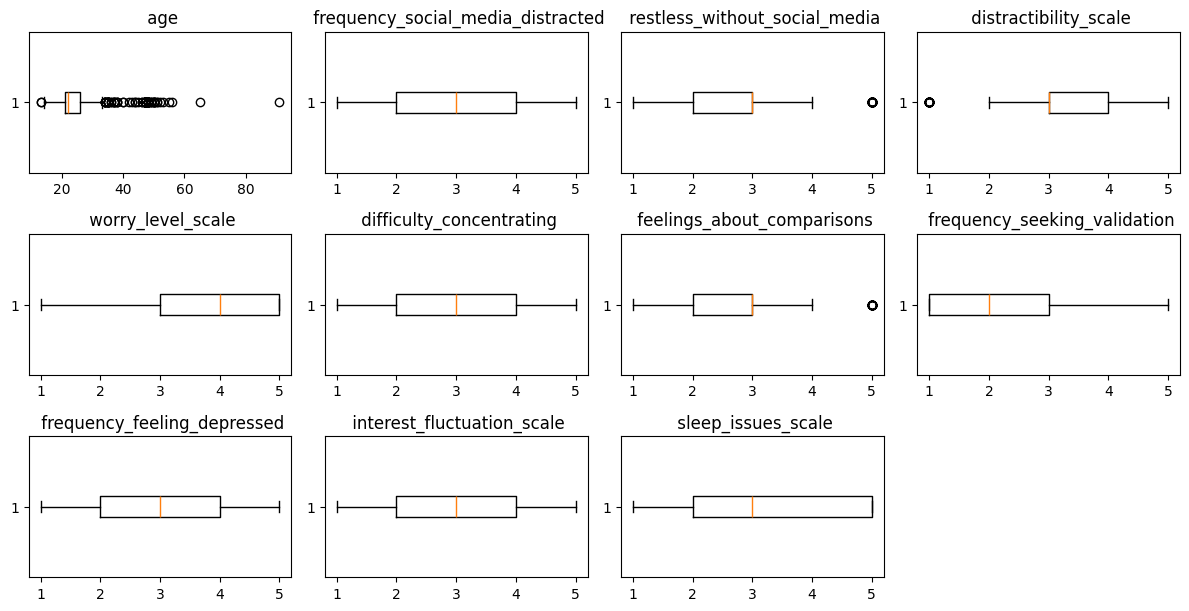

In [32]:
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f' {col}')

plt.tight_layout()
plt.show()

## Exploratory data analysis - EDA

In [33]:
df.columns

Index(['age', 'gender', 'relationship_status', 'occupation_status',
       'use_social_media', 'social_media_platforms', 'daily_social_media_time',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'distractibility_scale', 'worry_level_scale',
       'difficulty_concentrating', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale'],
      dtype='object')

In [34]:
df['social_media_platforms']

0      Facebook, Twitter, Instagram, YouTube, Discord...
1      Facebook, Twitter, Instagram, YouTube, Discord...
2                Facebook, Instagram, YouTube, Pinterest
3                                    Facebook, Instagram
4                           Facebook, Instagram, YouTube
                             ...                        
476                         Facebook, Instagram, YouTube
477                                    Facebook, YouTube
478                                    Facebook, YouTube
479    Facebook, Twitter, Instagram, YouTube, Discord...
480                                    Facebook, YouTube
Name: social_media_platforms, Length: 451, dtype: object

### Age distribution of the users

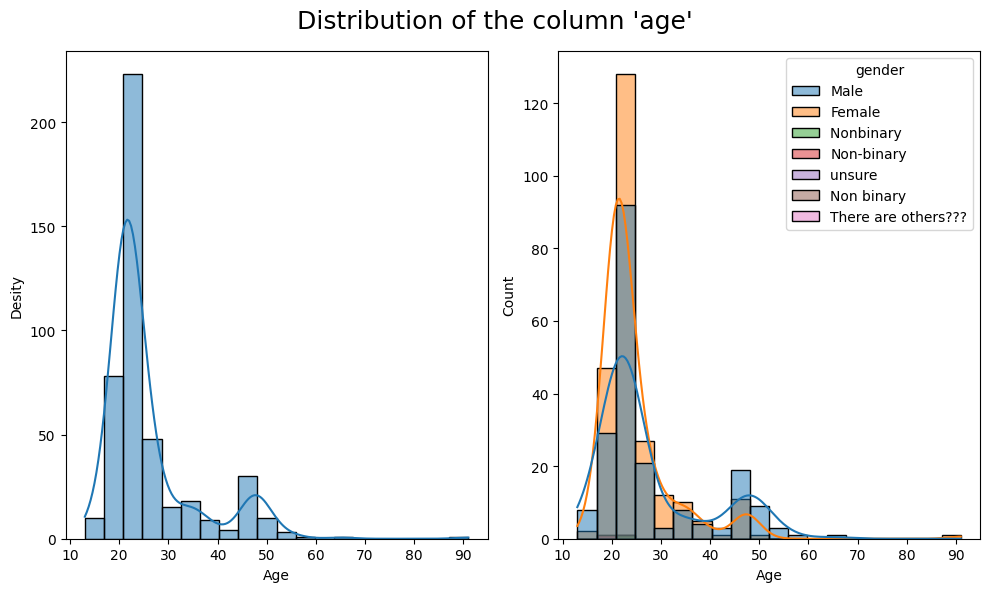

In [35]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.histplot(data=df, x="age", kde=True, bins=20, ax=ax[0])
sns.histplot(data=df, x="age", kde=True, bins=20, hue="gender", ax=ax[1])
fig.suptitle("Distribution of the column 'age'", fontsize=18)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Desity")
ax[1].set_xlabel("Age")
plt.tight_layout();

Most social media users are young, but there's also a clear second peak for users in their late 40s. Both men and women show this two-peaked pattern.

## Data distribution 

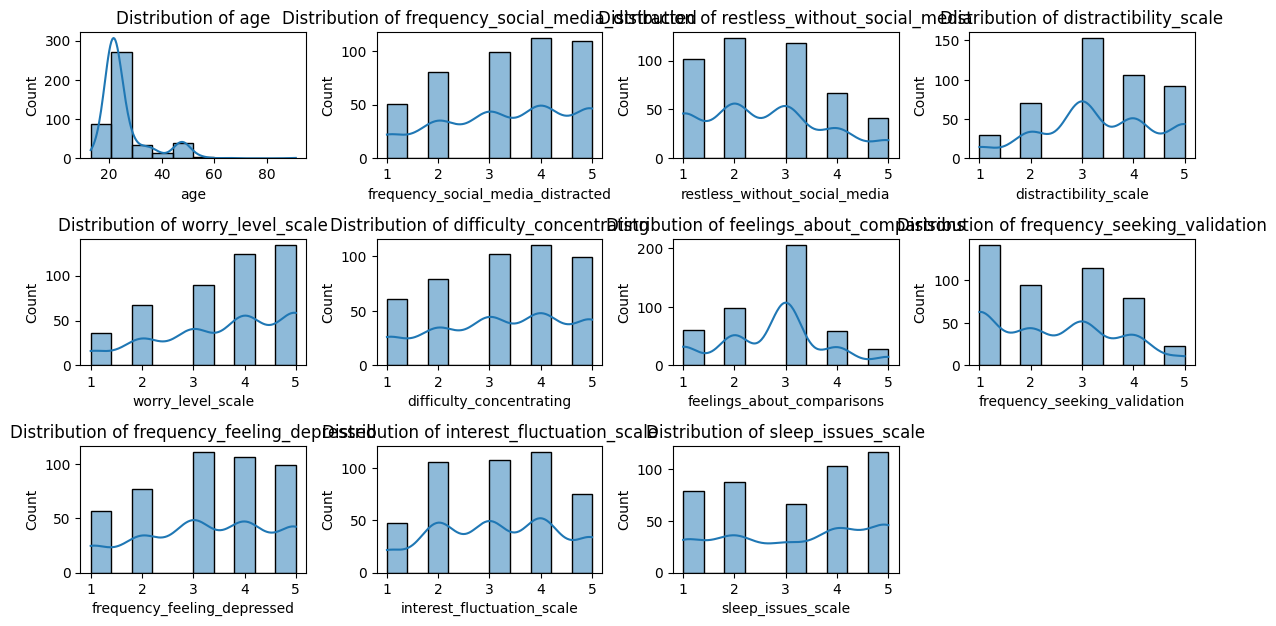

In [36]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.select_dtypes('number'), 1):# selecting numerical datatypes 
    plt.subplot(4, 4, i)
    sns.histplot(data = df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

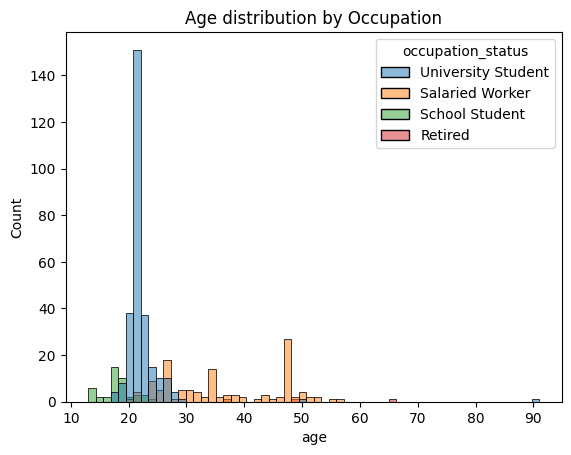

In [37]:
#Age vs occupation 
sns.histplot(df, x = 'age', hue = 'occupation_status')
plt.title("Age distribution by Occupation")
plt.show()

In [38]:
# sns.pairplot(df_encoded)

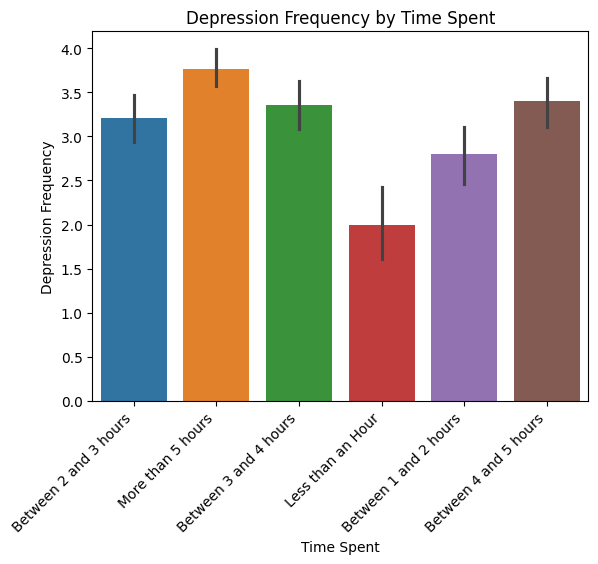

In [39]:

sns.barplot(df, x = 'daily_social_media_time', y = "frequency_feeling_depressed" ,hue = 'daily_social_media_time')
plt.title("Depression Frequency by Time Spent")
plt.xlabel("Time Spent")
plt.ylabel("Depression Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

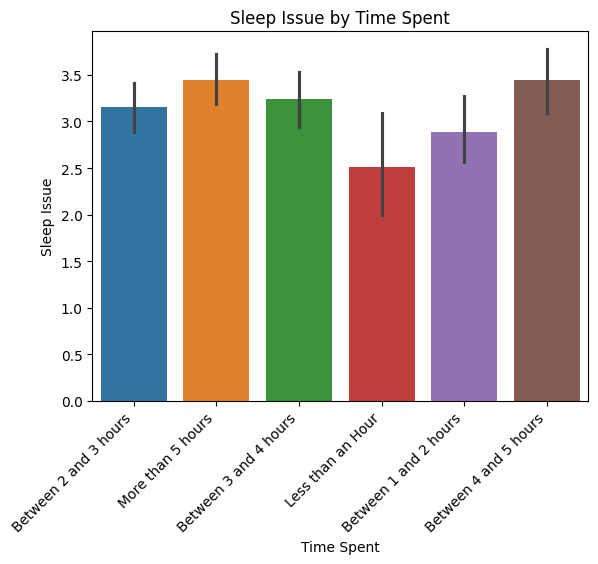

In [40]:
sns.barplot(df, x = 'daily_social_media_time', y = "sleep_issues_scale" ,hue = 'daily_social_media_time')
plt.title("Sleep Issue by Time Spent")
plt.xlabel("Time Spent")
plt.ylabel("Sleep Issue")
plt.xticks(rotation=45, ha='right')
plt.show()

## EDA for various platforms uses

In [41]:
df.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3,2,5,2,5,3,2,5,4,5
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3,2,4,5,4,1,1,5,4,5
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2,1,2,5,4,3,1,4,2,5
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,2,1,3,5,3,1,2,4,3,2
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5,4,4,5,5,3,3,4,4,1


### Reorganizing Social Paltforms(facebook , instagram, ...) data for better usages.
- i.e Handling categorical variables for Social media platforms

In [42]:

# MultiLabelBinarizer for 'social_media_platforms' (multi-selection)
mlb = MultiLabelBinarizer()
df['social_media_platforms_list'] = df['social_media_platforms'].str.split(', ')
platforms_encoded = mlb.fit_transform(df['social_media_platforms_list'])
df_social_media_platforms = pd.DataFrame(platforms_encoded, columns=mlb.classes_)
df = pd.concat([df, df_social_media_platforms], axis=1)

In [43]:
df_social_media_platforms.head()

,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,1,1,1,0,1,0,0,1,1
1,1,1,1,0,1,0,0,1,1
2,0,1,1,1,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,1


In [44]:
df.head(5)

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,...,social_media_platforms_list,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3.0,2.0,5.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3.0,2.0,4.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2.0,1.0,2.0,...,"[Facebook, Instagram, YouTube, Pinterest]",0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,2.0,1.0,3.0,...,"[Facebook, Instagram]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5.0,4.0,4.0,...,"[Facebook, Instagram, YouTube]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
df_social_media_platforms.columns

Index(['Discord', 'Facebook', 'Instagram', 'Pinterest', 'Reddit', 'Snapchat',
       'TikTok', 'Twitter', 'YouTube'],
      dtype='object')

In [46]:
df.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,...,social_media_platforms_list,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3.0,2.0,5.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3.0,2.0,4.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2.0,1.0,2.0,...,"[Facebook, Instagram, YouTube, Pinterest]",0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,2.0,1.0,3.0,...,"[Facebook, Instagram]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5.0,4.0,4.0,...,"[Facebook, Instagram, YouTube]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Filtering age based dataframe for analysis of relative usage per age group

In [47]:
df_20 = df.query("age <= 20")
df_21_30 = df.query("age > 20 & age <=30")
df_31_40 = df.query("age > 30 & age <=40")
df_40 = df.query("age > 40")

print(f"Age below 20: n={len(df_20)}")
print(f"Age 21 to 30: n={len(df_21_30)}")
print(f"Age 31 to 40: n={len(df_31_40)}")
print(f"Age above 40: n={len(df_40)}")

Age below 20: n=88
Age 21 to 30: n=281
Age 31 to 40: n=32
Age above 40: n=50


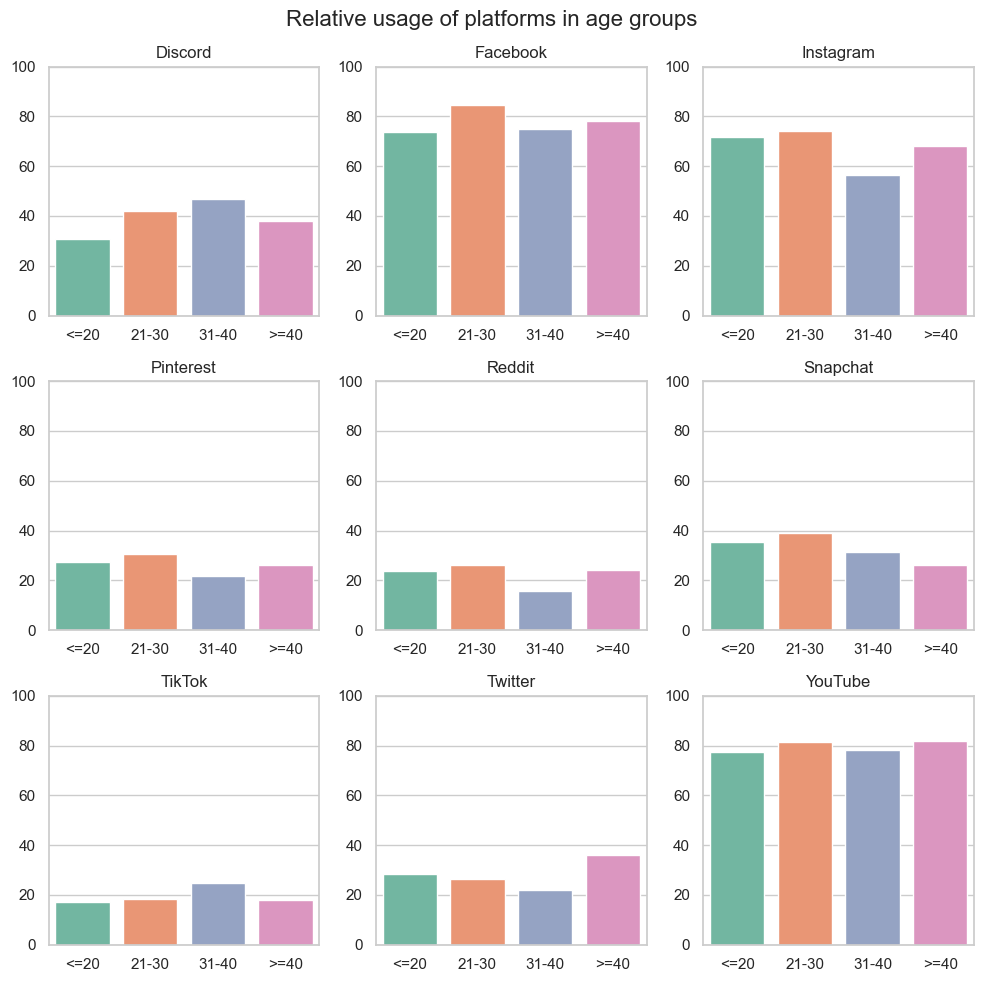

In [48]:
# Analysing relative values for different platforms 
sns.set_theme(style="whitegrid", palette="Set2")

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for ax, platform in zip(axes, df_social_media_platforms.columns):
    x_list = ["<=20", "21-30", "31-40", ">=40"]
    percent20 = df_20[platform].sum() / len(df_20) * 100
    percent2130 = df_21_30[platform].sum() / len(df_21_30) * 100
    percent3140 = df_31_40[platform].sum() / len(df_31_40) * 100
    percent40 = df_40[platform].sum() / len(df_40) * 100
    y_list = [percent20, percent2130, percent3140, percent40]
    
    # Pass x_list to hue and disable legend
    sns.barplot(x=x_list, y=y_list, hue=x_list, ax=ax, palette="Set2", dodge=False, legend=False)
    ax.set_ylim(0, 100)
    ax.set_title(platform)
    
 

fig.suptitle("Relative usage of platforms in age groups", fontsize=16)
plt.tight_layout()
plt.show()


## correlations between user behaviors (like usage frequency and self-comparison) and mental health indicators.

##  explored correlations among mental health-related questions (e.g., feeling down, sleep issues) and user demographic data.

## Handling categorical for whether user use social media or not

In [49]:
df_encoded['use_social_media'].unique()

array(['Yes', 'No'], dtype=object)

In [50]:
# Handling categorical variables for using social media or not
use_social_media_mapping = {
    'No' : 0,
    'Yes': 1
}
df_encoded['use_social_media'] = df_encoded['use_social_media'].map(use_social_media_mapping)

time_mapping = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 5.5
}

# Apply the mapping

df_encoded['daily_social_media_time'] = df_encoded['daily_social_media_time'].map(time_mapping)

In [51]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,21.0,0,1,0,1,"Facebook, Twitter, Instagram, YouTube, Discord...",2.5,3,2,5,2,5,3,2,5,4,5
1,21.0,1,0,0,1,"Facebook, Twitter, Instagram, YouTube, Discord...",5.5,3,2,4,5,4,1,1,5,4,5
2,21.0,1,0,0,1,"Facebook, Instagram, YouTube, Pinterest",3.5,2,1,2,5,4,3,1,4,2,5
3,21.0,1,0,0,1,"Facebook, Instagram",5.5,2,1,3,5,3,1,2,4,3,2
4,21.0,1,0,0,1,"Facebook, Instagram, YouTube",2.5,5,4,4,5,5,3,3,4,4,1


 ### scaling categorical variables (like relationship status, occupation status) and optimizing feature importance

In [52]:
# # correlation_matrix = df_encoded[['daily_social_media_time', 'frequency_feeling_depressed']].corr()
# plt.figure(figsize=(12,6))
# sns.heatmap(df_encoded, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap: Social Media Time vs Depression Level')
# plt.show()

## Feature engineering 

- Creating derived features(mental_risk) from other mental risk paramaters

In [53]:

risk_columns = [
    'worry_level_scale',
    'frequency_feeling_depressed',
    'sleep_issues_scale',
    'difficulty_concentrating',
    'distractibility_scale',
    'interest_fluctuation_scale',
    
    'frequency_seeking_validation',
    'feelings_about_comparisons',
    'frequency_social_media_distracted',
    'restless_without_social_media'
]

# average risk score
df_encoded['mental_risk_score'] = df_encoded[risk_columns].mean(axis=1)

# Binarize the risk score: high risk (1) if above median, low risk (0) otherwise
threshold = df_encoded['mental_risk_score'].median()
df_encoded['mental_risk'] = (df_encoded['mental_risk_score'] > threshold).astype(int)

In [54]:
df_encoded.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale,mental_risk_score,mental_risk
0,21.0,0,1,0,1,"Facebook, Twitter, Instagram, YouTube, Discord...",2.5,3,2,5,2,5,3,2,5,4,5,3.6,1
1,21.0,1,0,0,1,"Facebook, Twitter, Instagram, YouTube, Discord...",5.5,3,2,4,5,4,1,1,5,4,5,3.4,1
2,21.0,1,0,0,1,"Facebook, Instagram, YouTube, Pinterest",3.5,2,1,2,5,4,3,1,4,2,5,2.9,0
3,21.0,1,0,0,1,"Facebook, Instagram",5.5,2,1,3,5,3,1,2,4,3,2,2.6,0
4,21.0,1,0,0,1,"Facebook, Instagram, YouTube",2.5,5,4,4,5,5,3,3,4,4,1,3.8,1


In [55]:
df.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,...,social_media_platforms_list,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3.0,2.0,5.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3.0,2.0,4.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2.0,1.0,2.0,...,"[Facebook, Instagram, YouTube, Pinterest]",0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,2.0,1.0,3.0,...,"[Facebook, Instagram]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5.0,4.0,4.0,...,"[Facebook, Instagram, YouTube]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model Building

In [56]:
df_encoded.drop(columns=['social_media_platforms'],inplace=True)
df_encoded = pd.concat([df_encoded, df_social_media_platforms], axis=1)

In [57]:
df_encoded.isnull().sum()

age                                  28
gender                               28
relationship_status                  28
occupation_status                    28
use_social_media                     28
daily_social_media_time              28
frequency_social_media_distracted    28
restless_without_social_media        28
distractibility_scale                28
worry_level_scale                    28
difficulty_concentrating             28
feelings_about_comparisons           28
frequency_seeking_validation         28
frequency_feeling_depressed          28
interest_fluctuation_scale           28
sleep_issues_scale                   28
mental_risk_score                    28
mental_risk                          28
Discord                              28
Facebook                             28
Instagram                            28
Pinterest                            28
Reddit                               28
Snapchat                             28
TikTok                               28


In [58]:
df_encoded.dropna(inplace = True)


In [59]:
df_encoded.isnull().sum()

age                                  0
gender                               0
relationship_status                  0
occupation_status                    0
use_social_media                     0
daily_social_media_time              0
frequency_social_media_distracted    0
restless_without_social_media        0
distractibility_scale                0
worry_level_scale                    0
difficulty_concentrating             0
feelings_about_comparisons           0
frequency_seeking_validation         0
frequency_feeling_depressed          0
interest_fluctuation_scale           0
sleep_issues_scale                   0
mental_risk_score                    0
mental_risk                          0
Discord                              0
Facebook                             0
Instagram                            0
Pinterest                            0
Reddit                               0
Snapchat                             0
TikTok                               0
Twitter                  

### Modeling Approach A: Logistic regression  model

In [60]:
# Define the target variable (binary classification: 1 if score >= 4, else 0)
# df_encoded['target_depressed'] = (df_encoded["frequency_feeling_depressed"] >= 4).astype(int)

# X = df_encoded.drop('target_depressed', axis=1)
# y = df_encoded['target_depressed']
# X = df_encoded.drop('frequency_feeling_depressed', axis=1)

In [61]:
df_encoded.columns

Index(['age', 'gender', 'relationship_status', 'occupation_status',
       'use_social_media', 'daily_social_media_time',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'distractibility_scale', 'worry_level_scale',
       'difficulty_concentrating', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale', 'mental_risk_score',
       'mental_risk', 'Discord', 'Facebook', 'Instagram', 'Pinterest',
       'Reddit', 'Snapchat', 'TikTok', 'Twitter', 'YouTube'],
      dtype='object')

In [62]:
df_encoded.columns

Index(['age', 'gender', 'relationship_status', 'occupation_status',
       'use_social_media', 'daily_social_media_time',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'distractibility_scale', 'worry_level_scale',
       'difficulty_concentrating', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale', 'mental_risk_score',
       'mental_risk', 'Discord', 'Facebook', 'Instagram', 'Pinterest',
       'Reddit', 'Snapchat', 'TikTok', 'Twitter', 'YouTube'],
      dtype='object')

In [63]:
df.head()

,age,gender,relationship_status,occupation_status,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_distracted,restless_without_social_media,distractibility_scale,...,social_media_platforms_list,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3.0,2.0,5.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3.0,2.0,4.0,...,"[Facebook, Twitter, Instagram, YouTube, Discor...",1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2.0,1.0,2.0,...,"[Facebook, Instagram, YouTube, Pinterest]",0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,2.0,1.0,3.0,...,"[Facebook, Instagram]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5.0,4.0,4.0,...,"[Facebook, Instagram, YouTube]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
df_encoded.columns

Index(['age', 'gender', 'relationship_status', 'occupation_status',
       'use_social_media', 'daily_social_media_time',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'distractibility_scale', 'worry_level_scale',
       'difficulty_concentrating', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale', 'mental_risk_score',
       'mental_risk', 'Discord', 'Facebook', 'Instagram', 'Pinterest',
       'Reddit', 'Snapchat', 'TikTok', 'Twitter', 'YouTube'],
      dtype='object')

In [65]:

cols_to_drop = [
    ## already influencing factors that I used for feature engineering for mental_risk formation 
    'mental_risk_score', 'mental_risk',
    'worry_level_scale', 'frequency_feeling_depressed',
    'sleep_issues_scale', 'difficulty_concentrating',
    'distractibility_scale', 'interest_fluctuation_scale', 
    'frequency_seeking_validation','feelings_about_comparisons',
    'frequency_social_media_distracted','restless_without_social_media'
    
]

X = df_encoded.drop(columns=cols_to_drop)
y = df_encoded['mental_risk']#target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Since target (mental_risk) is built from several risk-related scales, using those same scales in X will cause data leakage and artificially boost performance. 

- To avoid this, you should drop features that directly contribute to the target calculation

In [66]:
X_train

,age,gender,relationship_status,occupation_status,use_social_media,daily_social_media_time,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
143,46.0,0.0,3.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
33,18.0,1.0,0.0,2.0,1.0,2.5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
93,17.0,2.0,0.0,2.0,1.0,4.5,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
311,22.0,0.0,0.0,0.0,1.0,5.5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
400,19.0,0.0,0.0,0.0,1.0,3.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,18.0,1.0,0.0,0.0,1.0,3.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
117,22.0,1.0,0.0,0.0,1.0,5.5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
291,25.0,1.0,1.0,0.0,1.0,3.5,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
372,23.0,1.0,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
y_test

157    0.0
301    1.0
190    0.0
438    0.0
447    1.0
      ... 
61     1.0
442    0.0
26     1.0
18     0.0
72     1.0
Name: mental_risk, Length: 85, dtype: float64

In [68]:
# Create and fit the logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train,y_train)
lr_model

LogisticRegression(max_iter=500, random_state=42)

In [69]:
y_pred = lr_model.predict(X_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.])

## Creating confusion matrix

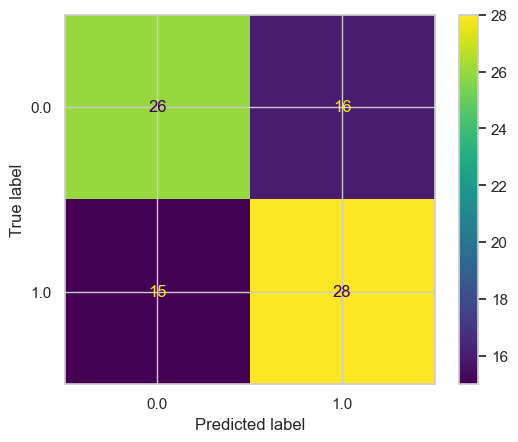

In [70]:
# Compute values for confusion matrix
lr_cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, 
                                  display_labels=lr_model.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

plt.show()

## Performance Metrics

In [71]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred,average='weighted'))
print("Recall:", "%.6f" % recall_score(y_test, y_pred,average='weighted'))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.635294
Precision: 0.635268
Recall: 0.635294
F1 Score: 0.635193


### Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

In [ ]:
# Instantiate model
decision_tree_tuned = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }


# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
decision_tree_grid = GridSearchCV(decision_tree_tuned, cv_params, scoring=scoring, cv=4, refit='roc_auc' )

In [86]:
decision_tree_grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [87]:
# Best hyperparameters and corresponding score
print("Best Hyperparameters:", decision_tree_grid.best_params_)
print("Best  ROC AUC Score:", decision_tree_grid.best_score_)

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best  ROC AUC Score: 0.6419817927170868


- This shows strong AUC score in order to predict whether person has mental_risk or not 

In [88]:
y_tuned_pred = decision_tree_grid.predict(X_test)

## Extracting all the scores from the grid search

In [90]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
   
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Using above function to get all the scores from grid search cv

In [91]:
decision_tree_cv_results = make_results('Decision Tree Cross Validation', decision_tree_grid, 'auc')
decision_tree_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree Cross Validation,0.602573,0.856765,0.705707,0.636064,0.654597


All of these scores from the decision tree model are strong indicators of good model performance. 

## Decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

In [95]:
### Pickle the model using serialization 

import pickle
with open('logistic.pkl', 'wb') as f:
    pickle.dump({
        'model': lr_model,
        'X_test': X_test,
        'y_test': y_test
    }, f)

In [93]:
X.columns

Index(['age', 'gender', 'relationship_status', 'occupation_status',
       'use_social_media', 'daily_social_media_time', 'Discord', 'Facebook',
       'Instagram', 'Pinterest', 'Reddit', 'Snapchat', 'TikTok', 'Twitter',
       'YouTube'],
      dtype='object')

In [94]:
# # Plot the tree
# from sklearn.tree import plot_tree

# # plt.figure(figsize=(85,20))
# # plot_tree(decision_tree_tuned, max_depth=6, fontsize=14, feature_names=X.columns, 
# #           class_names={0:'stayed', 1:'left'}, filled=True);
# # plt.show()

# # # Plot the tree ()
# plt.figure(figsize=(85,20))
# plot_tree(decision_tree_tuned, max_depth=6, fontsize=14, filled=True)
# plt.show()